In [1]:
import os
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D 


In [2]:
data = np.loadtxt(os.path.join('ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))


  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


In [3]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    n = X.shape[1]
    for i in range (0,n):
        mu[i] = np.mean(X[:,i])
        sigma[i] = np.std(X[:,i])
        X_norm[:,i] = (X[:,i] - mu[i])/sigma[i]
    return X_norm, mu, sigma


In [4]:
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)


Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


In [5]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i,0],X[i, 1], y[i]))


  X[:,0] X[:, 1]         y
--------------------------
       1       0    399900
       1      -1    329900
       1       1    369000
       1      -1    232000
       1       1    539900
       1      -0    299900
       1      -1    314900
       1      -1    198999
       1      -1    212000
       1      -1    242500


In [6]:
def computeCostMulti(X, y, theta):
    pred = X.dot(theta)
    J = (np.sum(np.square(pred-y)))/(2*m)
    return J

In [7]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        pred = np.dot(X,theta)
        theta = theta - alpha*(X.T.dot(pred - y))/m
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

theta computed from gradient descent: [340412.65957447 109447.79558639  -6578.3539709 ]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293081


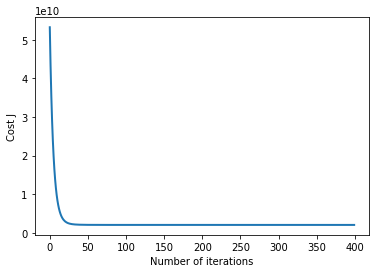

In [8]:
alpha = 0.1
num_iters = 400
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
print('theta computed from gradient descent: {:s}'.format(str(theta)))
price = 0
X_input = np.array([1650, 3])
X_intm = (X_input - mu)/sigma
X_final = np.append(np.array([1,]),X_intm)
price = np.sum(np.dot(X_final,theta))
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))
